<a href="https://colab.research.google.com/github/aaron34x/Proyect-Bussines-Analytics/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exploratory Data Analysis

In [1]:
#Exportar Librerias
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv('/content/data_union.csv')
df.head()

Player                 Club  Age Position   Nation      Value  \
0  KYLIAN MBAPPE  PARIS SAINT-GERMAIN   22   ATTACK   FRANCE  144000000   
1     HARRY KANE    TOTTENHAM HOTSPUR   28   ATTACK  ENGLAND  108000000   
2   JADON SANCHO    MANCHESTER UNITED   21   ATTACK  ENGLAND   90000000   
3  MOHAMED SALAH         LIVERPOOL FC   29   ATTACK    EGYPT   90000000   
4         NEYMAR  PARIS SAINT-GERMAIN   29   ATTACK   BRAZIL   90000000   

  Contract Years Left          League  Starts (20/21)  Min (20/21)  ...  \
0                   1         LIGUE 1            27.0       2380.0  ...   
1                   3  PREMIER LEAGUE            35.0       3082.0  ...   
2                   5  PREMIER LEAGUE            24.0       2062.0  ...   
3                   2  PREMIER LEAGUE            34.0       3078.0  ...   
4                   4         LIGUE 1            15.0       1415.0  ...   

   Own Goals (17/18)  Total Loose Balls Recovered (17/18)  \
0                0.0                                 98.0   
1                0.0                                124.0   
2                0.0                                 57.0   
3                0.0                                219.0   
4                0.0                                110.0   

   Aerial Duel Won (17/18)  Aerial Duel Lost (17/18)  \
0                      1.0                       4.0   
1                     69.0                     111.0   
2                      3.0                      14.0   
3                     19.0                      58.0   
4                      2.0                       2.0   

   % Aerial Duels Won (17/18)   Foot  NationalTeamCaps  MostRecentInjury  \
0                        20.0  RIGHT                33                 0   
1                        38.3  RIGHT                43                 0   
2                        17.6  RIGHT                11                 0   
3                        24.7   LEFT                67                 0   
4                        50.0  RIGHT               102                 1   

   Height (cm)  Total_Games  
0          178        107.0  
1          188        129.0  
2          180        104.0  
3          175        145.0  
4          175         70.0  

[5 rows x 545 columns]

In [ ]:
df.dtypes

Player               object
Club                 object
Age                   int64
Position             object
Nation               object
                     ...   
Foot                 object
NationalTeamCaps      int64
MostRecentInjury      int64
Height (cm)           int64
Total_Games         float64
Length: 545, dtype: object

In [ ]:
df['Value'].describe()

count    1.287000e+03
mean     1.328535e+07
std      1.613764e+07
min      2.700000e+05
25%      2.700000e+06
50%      6.750000e+06
75%      1.800000e+07
max      1.440000e+08
Name: Value, dtype: float64

<Axes: xlabel='Value', ylabel='Count'>

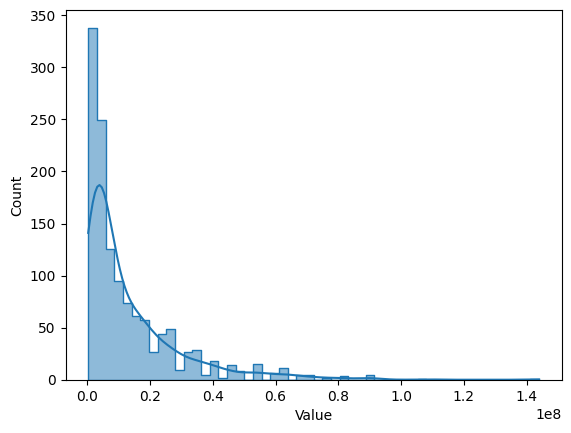

In [ ]:
# Se grafica una histograma para observar el comportamiento del valor de los futbolistas
sns.histplot(df['Value'],kde=True,element='step')

In [ ]:
# Se crean dataframes diferentes de acuerdo a la posicion de los jugadores
df_attack=df[df['Position']=='ATTACK']
df_defender=df[df['Position']=='DEFENDER']
df_midfield=df[df['Position']=="MIDFIELD"]

In [ ]:
df['Position'].value_counts()

DEFENDER      520
MIDFIELD      388
ATTACK        375
GOALKEEPER      4
Name: Position, dtype: int64

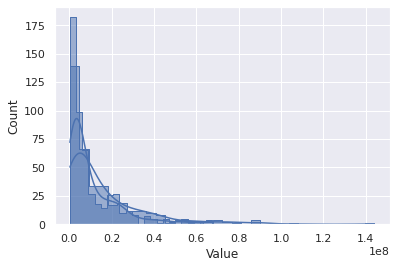

In [ ]:
#Se visualazacion del comportamiento por cada posicion de acuerdo al valor de los futbolistas
# Delanteros
sns.histplot(df_attack['Value'],kde=True,element='step')


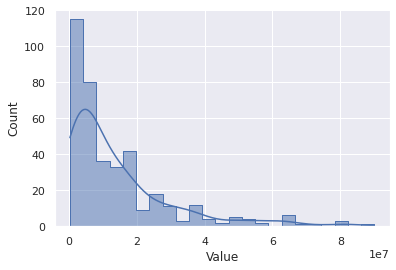

In [ ]:
#Medio Campistas
sns.histplot(df_midfield['Value'],kde=True,element='step')

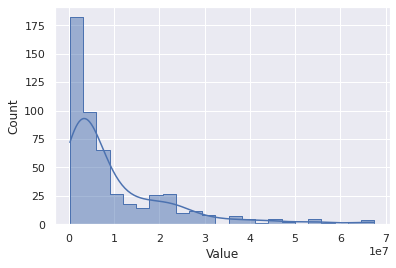

In [ ]:
#Defensores
sns.histplot(df_defender['Value'],kde=True,element='step')

In [ ]:
df_attack.corr()

Age     Value  Starts (20/21)  Min (20/21)  \
Age                         1.000000 -0.275507       -0.027967    -0.025913   
Value                      -0.275507  1.000000        0.443918     0.458611   
Starts (20/21)             -0.027967  0.443918        1.000000     0.988188   
Min (20/21)                -0.025913  0.458611        0.988188     1.000000   
Total Mins/90 (20/21)      -0.026206  0.458540        0.988189     0.999995   
...                              ...       ...             ...          ...   
% Aerial Duels Won (17/18)  0.065137 -0.099994       -0.058708    -0.054402   
NationalTeamCaps            0.368302  0.238554        0.104758     0.103006   
MostRecentInjury            0.022512 -0.128556       -0.205647    -0.211323   
Height (cm)                 0.085906 -0.100987       -0.028837    -0.012564   
Total_Games                 0.199090  0.336577        0.693702     0.717183   

                            Total Mins/90 (20/21)  Gls (20/21)  Ast (20/21)  \
Age                                     -0.026206     0.109569     0.015513   
Value                                    0.458540     0.537791     0.534112   
Starts (20/21)                           0.988189     0.670451     0.626272   
Min (20/21)                              0.999995     0.672919     0.627022   
Total Mins/90 (20/21)                    1.000000     0.673124     0.627026   
...                                           ...          ...          ...   
% Aerial Duels Won (17/18)              -0.054656     0.020930    -0.046229   
NationalTeamCaps                         0.102817     0.388456     0.213691   
MostRecentInjury                        -0.211518    -0.156372    -0.137464   
Height (cm)                             -0.012606     0.093032    -0.127745   
Total_Games                              0.717229     0.481405     0.463676   

                            Non-Penalty Goals (20/21)  \
Age                                          0.082594   
Value                                        0.527704   
Starts (20/21)                               0.666709   
Min (20/21)                                  0.666492   
Total Mins/90 (20/21)                        0.666706   
...                                               ...   
% Aerial Duels Won (17/18)                   0.021955   
NationalTeamCaps                             0.394959   
MostRecentInjury                            -0.170747   
Height (cm)                                  0.095790   
Total_Games                                  0.478242   

                            Penalties Scored (20/21)  \
Age                                         0.145844   
Value                                       0.353682   
Starts (20/21)                              0.414770   
Min (20/21)                                 0.424206   
Total Mins/90 (20/21)                       0.424305   
...                                              ...   
% Aerial Duels Won (17/18)                  0.009566   
NationalTeamCaps                            0.214644   
MostRecentInjury                           -0.051594   
Height (cm)                                 0.047851   
Total_Games                                 0.299230   

                            Penalties Attempted (20/21)  ...  \
Age                                            0.180083  ...   
Value                                          0.341225  ...   
Starts (20/21)                                 0.431996  ...   
Min (20/21)                                    0.441825  ...   
Total Mins/90 (20/21)                          0.441919  ...   
...                                                 ...  ...   
% Aerial Duels Won (17/18)                     0.018227  ...   
NationalTeamCaps                               0.232262  ...   
MostRecentInjury                              -0.057183  ...   
Height (cm)                                    0.048938  ...   
Total_Games                                    0.307256  ...   

        

In [ ]:
#Se calculan las correlacion de acuerdo a cada posiciones 
#Atacantes
corr_attack=df_attack.corr()
corr_attack['Value'].sort_values(ascending=False)

Value                                         1.000000
Touches in Attacking Penalty Box (20/21)      0.663327
Carries into Attacking Penalty Box (20/21)    0.656137
Goal Creating Actions (20/21)                 0.646211
Non-penalty xG+ xA (20/21)                    0.643428
                                                ...   
Height (cm)                                  -0.100987
Touches in Defensive Penalty Box (17/18)     -0.101199
Total Clearances (17/18)                     -0.111556
MostRecentInjury                             -0.128556
Age                                          -0.275507
Name: Value, Length: 538, dtype: float64

In [ ]:
#Medio Campistas
corr_midfield=df_midfield.corr()
corr_midfield['Value'].sort_values(ascending=False)

Value                                                           1.000000
Total Carries in Forward Direction (20/21)                      0.554296
Number of Times Player was Pass Target (20/21)                  0.548029
Number of Times Received Pass (20/21)                           0.542098
Total Distance Carried the Ball in Forward Direction (20/21)    0.540130
                                                                  ...   
Avg Shot Distance (yds) (20/21)                                -0.083561
Avg Shot Distance (yds) (18/19)                                -0.093786
% of Dribblers Tackled (17/18)                                 -0.100252
Avg Shot Distance (yds) (19/20)                                -0.105854
Age                                                            -0.269201
Name: Value, Length: 538, dtype: float64

In [ ]:
#Defensores
corr_defense=df_defender.corr()
corr_defense['Value'].sort_values(ascending=False)

Value                                               1.000000
Total Distance Carried the Ball (20/21)             0.528064
Number of Times Player was Pass Target (20/21)      0.528029
Total Carries (20/21)                               0.528027
Number of Times Received Pass (20/21)               0.527178
                                                      ...   
Completed Crosses that enter Penalty Box (17/18)   -0.103056
Avg Shot Distance (yds) (17/18)                    -0.113350
Avg Shot Distance (yds) (19/20)                    -0.121969
Avg Shot Distance (yds) (20/21)                    -0.131219
Age                                                -0.380446
Name: Value, Length: 538, dtype: float64

In [ ]:
corr_attack_positive=corr_attack[corr_attack['Value']>=0]
corr_midfield_positive=corr_midfield[corr_attack['Value']>=0]
corr_defense_positive=corr_defense[corr_attack['Value']>=0]

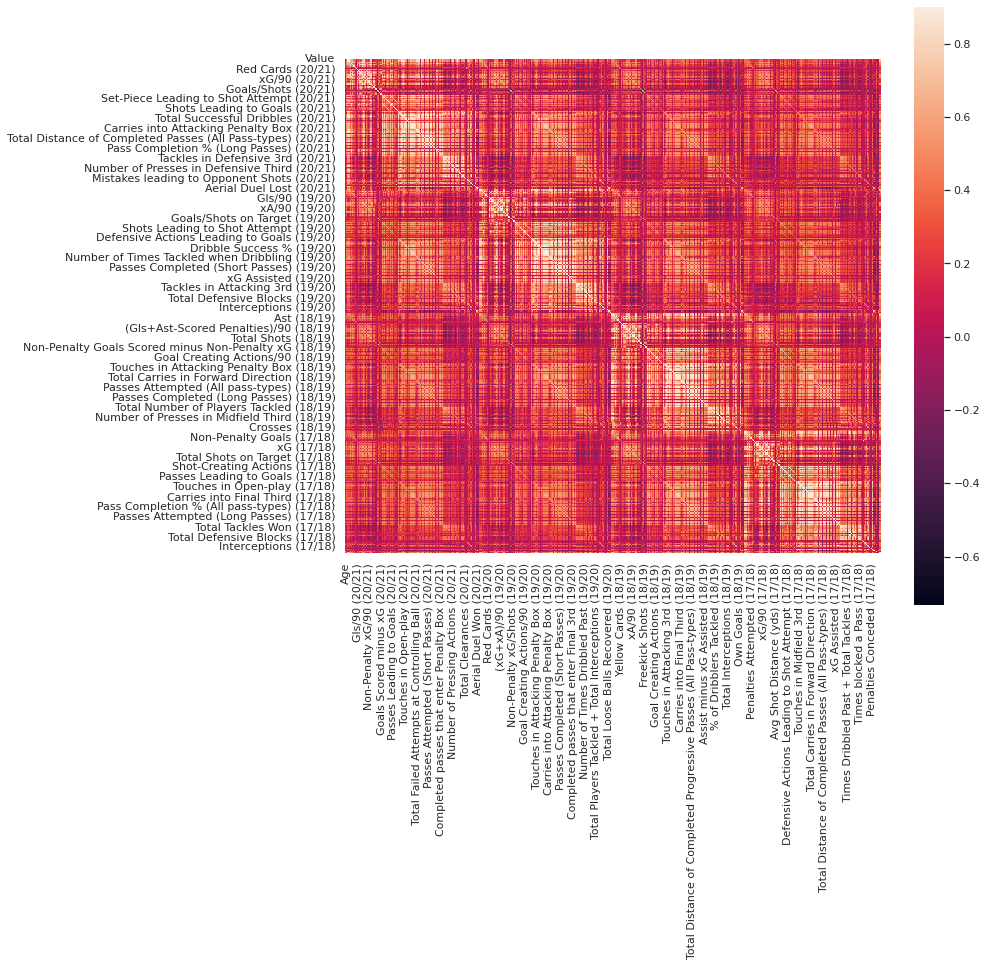

In [ ]:
#Matriz de correlacion de atacantes
f,ax=plt.subplots(figsize=(12,11))
sns.heatmap(corr_attack_positive,square=True,vmax=0.9)

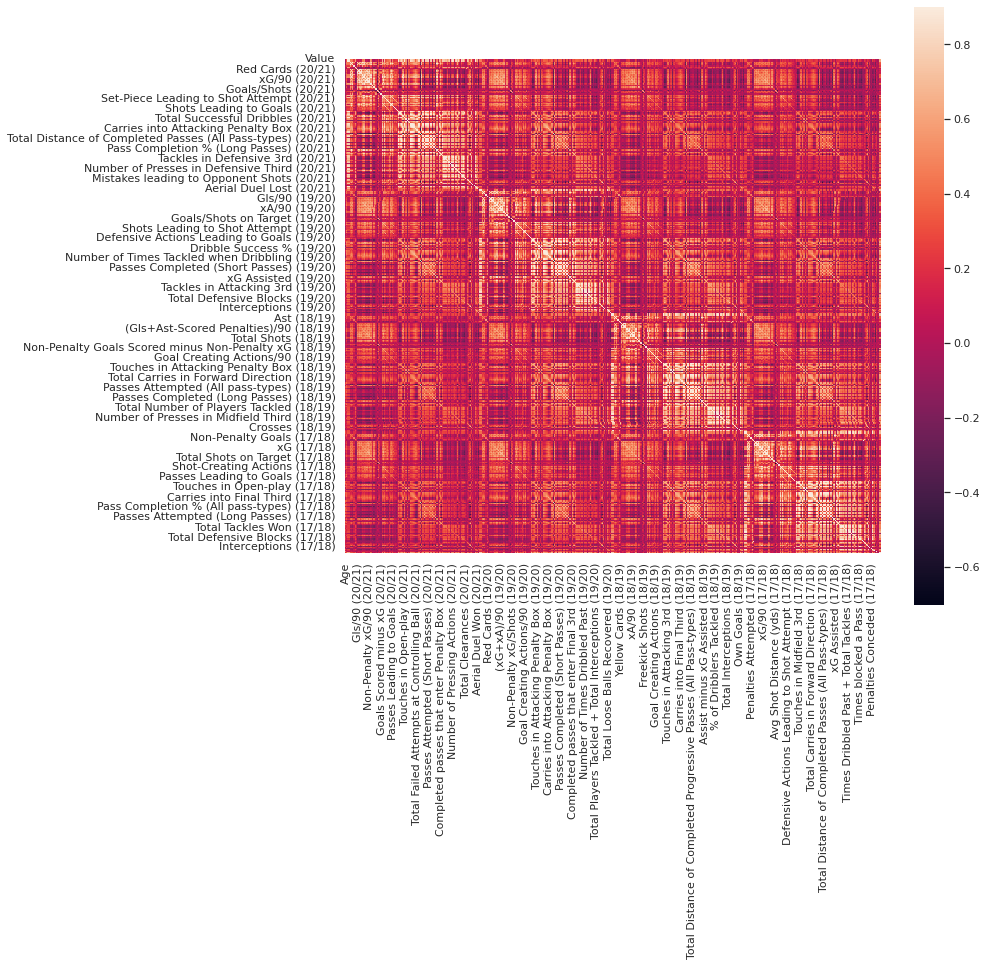

In [ ]:
#Matriz de correlacion de medio campistas
f,ax=plt.subplots(figsize=(12,11))
sns.heatmap(corr_midfield_positive,square=True,vmax=0.9)

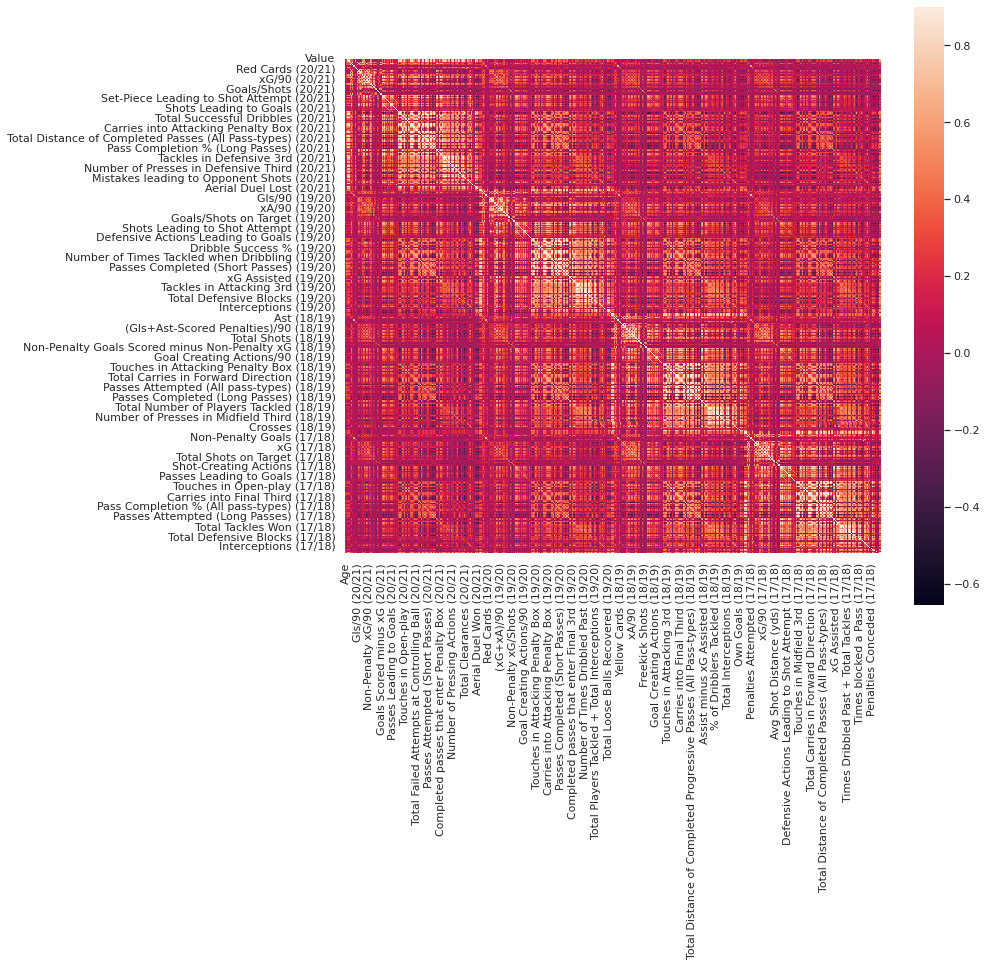

In [ ]:
#Matriz de correlacion de defensas
f,ax=plt.subplots(figsize=(12,11))
sns.heatmap(corr_defense_positive,square=True,vmax=0.9)

In [ ]:
corrmat['Value'].sort_values()

Age                                              -0.306600
% of Dribblers Tackled (19/20)                   -0.115994
% Aerial Duels Won (17/18)                       -0.103718
% of Dribblers Tackled (17/18)                   -0.103166
% of Dribblers Tackled (18/19)                   -0.095658
                                                    ...   
Passes Leading to Goals (20/21)                   0.516059
Number of Times Player was Pass Target (20/21)    0.517301
Total Carries in Forward Direction (20/21)        0.528977
Goal Creating Actions (20/21)                     0.530437
Value                                             1.000000
Name: Value, Length: 538, dtype: float64

In [ ]:
serie = corrmat['Value'].copy().sort_values(ascending=False).reset_index(drop=True)
serie

0      1.000000
1      0.530437
2      0.528977
3      0.517301
4      0.516059
         ...   
533   -0.095658
534   -0.103166
535   -0.103718
536   -0.115994
537   -0.306600
Name: Value, Length: 538, dtype: float64

In [ ]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Value')['Value'].index
cm = np.corrcoef(df[cols].values.T)

#Linear Regression

In [3]:
import warnings
import itertools
import numpy as np

# Install gitpath below if not already available on your environment.
#! pip install git+https://github.com/maxnoe/python-gitpath
#import gitpath

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [4]:
attack=df[df['Position']=='ATTACK']
defence=df[df['Position']=='DEFENDER']
midfield=df[df['Position']=="MIDFIELD"]
position_list = [attack,midfield,defence]

In [ ]:
attack

Player                 Club  Age Position   Nation  \
0          KYLIAN MBAPPE  PARIS SAINT-GERMAIN   22   ATTACK   FRANCE   
1             HARRY KANE    TOTTENHAM HOTSPUR   28   ATTACK  ENGLAND   
2           JADON SANCHO    MANCHESTER UNITED   21   ATTACK  ENGLAND   
3          MOHAMED SALAH         LIVERPOOL FC   29   ATTACK    EGYPT   
4                 NEYMAR  PARIS SAINT-GERMAIN   29   ATTACK   BRAZIL   
...                  ...                  ...  ...      ...      ...   
1275        SIMONE EDERA            TORINO FC   24   ATTACK    ITALY   
1276         BILLY SHARP     SHEFFIELD UNITED   35   ATTACK  ENGLAND   
1277  SULEIMAN ABDULLAHI    1.FC UNION BERLIN   24   ATTACK  NIGERIA   
1279         ADAM SZALAI       1.FSV MAINZ 05   33   ATTACK  HUNGARY   
1286      LUCA SILIGARDI    PARMA CALCIO 1913   33   ATTACK    ITALY   

          Value Contract Years Left          League  Starts (20/21)  \
0     144000000                   1         LIGUE 1            27.0   
1     108000000                   3  PREMIER LEAGUE            35.0   
2      90000000                   5  PREMIER LEAGUE            24.0   
3      90000000                   2  PREMIER LEAGUE            34.0   
4      90000000                   4         LIGUE 1            15.0   
...         ...                 ...             ...             ...   
1275     450000                   2         SERIE A             3.0   
1276     450000                   1  PREMIER LEAGUE             7.0   
1277     450000                   1      BUNDESLIGA             1.0   
1279     360000                   1      BUNDESLIGA             8.0   
1286     270000                   1         SERIE A            11.0   

      Min (20/21)  ...  Own Goals (17/18)  \
0          2380.0  ...                0.0   
1          3082.0  ...                0.0   
2          2062.0  ...                0.0   
3          3078.0  ...                0.0   
4          1415.0  ...                0.0   
...           ...  ...                ...   
1275        307.0  ...                0.0   
1276        735.0  ...                0.0   
1277        157.0  ...                0.0   
1279        733.0  ...                0.0   
1286        988.0  ...                0.0   

      Total Loose Balls Recovered (17/18)  Aerial Duel Won (17/18)  \
0                                    98.0                      1.0   
1                                   124.0                     69.0   
2                                    57.0                      3.0   
3                                   219.0                     19.0   
4                                   110.0                      2.0   
...                                   ...                      ...   
1275                                 19.0                      2.0   
1276                                 40.5                     13.0   
1277                                 15.0                      6.0   
1279                                 35.0                     34.0   
1286                                 81.5                     10.5   

      Aerial Duel Lost (17/18)  % Aerial Duels Won (17/18)   Foot  \
0                          4.0                       20.00  RIGHT   
1                        111.0                       38.30  RIGHT   
2                         14.0                       17.60  RIGHT   
3                         58.0                       24.70   LEFT   
4                          2.0                       50.00  RIGHT   
...                        ...                         ...    ...   
1275                       1.0                       66.70   LEFT   
1276                      40.0                       24.65  RIGHT   
1277                      11.0                       35.30  RIGHT   
1279                      39.0                       46.60  RIGHT   
1286                      14.0                       50.20   LEFT   

      NationalTeamCaps  MostRecentInjury  Height (cm)  Total_Games  
0                   

In [ ]:
print(len(attack),len(midfield),len(defence))

375 388 520


In [9]:
lr_results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
a=1

for position in position_list:

    #Finding top 30 correlated features
    top_features_0 = list((abs(position.corr()['Value'])).sort_values(ascending=False)[1:10].keys())
    top_features_1 = list((abs(position.corr()['Value'])).sort_values(ascending=True)[1:10].keys())
    #print(top_features_1)
    #print(top_features_0)
    print(top_features_0 + top_features_1)
    top_features=top_features_0 + top_features_1
    #Separating target variable - 'Value'. Only top 10 features are included in X.
    X = position[top_features].values
    y = np.log1p(position['Value'].values)  #position['Value']y = 

    print(len(X))
    print(len(y))
    #Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

    ############################################################################

    # Making the distribution of the features more Gaussian

    pt = PowerTransformer()

    X_train_transformed = pt.fit_transform(X_train)
    X_test_transformed = pt.transform(X_test)

    ############################################################################

    # Scaling the data

    # Initiating Robust Scaler
    rs= RobustScaler()

    # Standardizing numerical columns
    X_train_scaled = rs.fit_transform(X_train_transformed)
    X_test_scaled = rs.transform(X_test_transformed)

    ############################################################################

    # Initiating the Linear Regressor
    lr = LinearRegression()

    # Fitting the Linear Regressor with Training Data
    lr.fit(X_train_scaled,y_train);

    ############################################################################

    cross_val_train = cross_val_score(lr, X_train_scaled, y_train, scoring="neg_root_mean_squared_error",cv=5)
    cross_val_test = cross_val_score(lr, X_test_scaled, y_test, scoring="neg_root_mean_squared_error",cv=5)

    ############################################################################

    #Train Results
    cross_val_train_mean = round(-(cross_val_train.mean()),2)
    cross_val_train_max = round(-(cross_val_train.min()),2)
    cross_val_train_min = round(-(cross_val_train.max()),2)

    #Test Results
    cross_val_test_mean = round(-(cross_val_test.mean()),2)
    cross_val_test_max = round(-(cross_val_test.min()),2)
    cross_val_test_min = round(-(cross_val_test.max()),2)

    #Appending Results to Dataframe and making Visuals
    
    if a == 1: 
        lr_results.loc[0] = ['Attack Train',np.expm1(cross_val_train_mean,cross_val_train_max,cross_val_train_min]
        lr_results.loc[1] = ['Attack Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

    if a == 2: 
        lr_results.loc[2] = ['Midfield Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
        lr_results.loc[3] = ['Midfield Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]
        
    if a == 3: 
        lr_results.loc[4] = ['Defend Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
        lr_results.loc[5] = ['Defend Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

    a+=1
    #LASSO
    #Incluir la correlacion negativas
    #Aplicar otras transformaciones
    #80%> De la varianza PCA
    #Arboles de decision 
    #Comparar los modelos sea con Cross Validation
    #Mejoras Hiperametros posibles

<ipython-input-9-65b5313ad8c4>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_features_0 = list((abs(position.corr()['Value'])).sort_values(ascending=False)[1:10].keys())
<ipython-input-9-65b5313ad8c4>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_features_1 = list((abs(position.corr()['Value'])).sort_values(ascending=True)[1:10].keys())


['Touches in Attacking Penalty Box (20/21)', 'Carries into Attacking Penalty Box (20/21)', 'Goal Creating Actions (20/21)', 'Non-penalty xG+ xA (20/21)', 'Touches in Attacking 3rd (20/21)', 'Passes Leading to Goals (20/21)', 'Shot-Creating Actions (20/21)', 'Passes Leading to Shot Attempt (20/21)', 'Touches in Attacking Penalty Box (19/20)', 'Avg Shot Distance (yds) (20/21)', 'Defensive Actions Leading to Shot Attempt (18/19)', 'Touches in Defensive 3rd (18/19)', 'Aerial Duel Won (19/20)', 'Aerial Duel Won (20/21)', 'Number of Presses in Defensive Third (18/19)', '% Aerial Duels Won (19/20)', 'Tackles in Midfield 3rd (18/19)', 'Own Goals (17/18)']
375
375


<ipython-input-9-65b5313ad8c4>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_features_0 = list((abs(position.corr()['Value'])).sort_values(ascending=False)[1:10].keys())
<ipython-input-9-65b5313ad8c4>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_features_1 = list((abs(position.corr()['Value'])).sort_values(ascending=True)[1:10].keys())


['Total Carries in Forward Direction (20/21)', 'Number of Times Player was Pass Target (20/21)', 'Number of Times Received Pass (20/21)', 'Total Distance Carried the Ball in Forward Direction (20/21)', 'Passes Leading to Shot Attempt (20/21)', 'Total Distance Carried the Ball (20/21)', 'Total Carries (20/21)', 'Touches in Attacking 3rd (20/21)', 'Passes Completed (Short Passes) (20/21)', 'Total Shots Blocked (18/19)', 'Total Clearances (19/20)', 'Penalties Conceded (17/18)', 'Goal Saving Blocks (18/19)', 'Total Shots Blocked (19/20)', 'Assist minus xG Assisted (18/19)', 'Dribbles Leading to Goals (18/19)', 'Yellow Cards (17/18)', 'Mistakes leading to Opponent Shots (19/20)']
388
388


<ipython-input-9-65b5313ad8c4>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_features_0 = list((abs(position.corr()['Value'])).sort_values(ascending=False)[1:10].keys())
<ipython-input-9-65b5313ad8c4>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_features_1 = list((abs(position.corr()['Value'])).sort_values(ascending=True)[1:10].keys())


['Total Distance Carried the Ball (20/21)', 'Number of Times Player was Pass Target (20/21)', 'Total Carries (20/21)', 'Number of Times Received Pass (20/21)', 'Number of Times Received Pass (19/20)', 'Total Carries (19/20)', 'Passes Completed (All pass-types) (19/20)', 'Total Distance Carried the Ball in Forward Direction (20/21)', 'Total Distance Carried the Ball (19/20)', 'Goal Creating Actions/90 (17/18)', 'Number of Times Dribbled Past (18/19)', 'Assist minus xG Assisted (17/18)', 'Number of Dribblers Tackled (17/18)', 'Goal Saving Blocks (20/21)', 'Number of Presses in Defensive Third (17/18)', 'Defensive Actions Leading to Shot Attempt (17/18)', 'Penalties Conceded (17/18)', 'xA (17/18)']
520
520


In [10]:
#Primera prueba solo correlaciones Positivas, las primeras 30 correlaciones
lr_results

Train/Test  Avg RMSE  Max RMSE  Min RMSE
0    Attack Train  1.363161      0.94      0.79
1     Attack Test  1.000000      1.09      0.82
2  Midfield Train  1.020000      1.08      0.99
3   Midfield Test  0.930000      1.04      0.75
4    Defend Train  1.030000      1.15      0.90
5     Defend Test  1.220000      1.58      0.97

In [ ]:
#Resultados con correlaciones Positivas y Negativas, 15 para cada lado
lr_results

Train/Test     Avg RMSE     Max RMSE     Min RMSE
0    Attack Train  14965711.12  17903455.99  12467561.92
1     Attack Test  11880426.14  14711217.12   9443253.87
2  Midfield Train  13788688.51  16411335.82  12117706.01
3   Midfield Test  15792891.97  18783135.14  10471442.40
4    Defend Train  10954505.74  11720122.60   9232715.65
5     Defend Test  11584878.83  14430470.41   8713006.02

# Desicion Tree

In [5]:
#import gitpath

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

### Desicion Tree Defence

In [82]:
col_a_dummies = (['Foot'])

#ejecuto la función get_dummies para sacar los dummies de las variables seleccionadas
dummies = pd.get_dummies(defence, columns=col_a_dummies)

In [155]:
top_features_0 = list((abs(dummies.corr()['Value'])).sort_values(ascending=True)[1:10].keys())+list((abs(dummies.corr()['Value'])).sort_values(ascending=False)[1:10].keys())
#top_features_0

In [165]:
X = dummies.drop(['Player','Value','Club','Position','Nation','League','Contract Years Left'],axis=1)
y = dummies['Value']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

#Initiating Robust Scaler
rs= RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)

In [168]:
#Initiating DecisionTreeRegressor to calculate feature importance
DtReg = DecisionTreeRegressor()

In [169]:
DtReg.fit(X_train_scaled,y_train)


DecisionTreeRegressor()

In [170]:
y_pred = DtReg.predict(X_test_scaled)

In [171]:
print(y_pred)
print(y_test)

[ 2250000. 18000000.  3600000.  2700000.  5400000.  9000000. 16200000.
 40500000.  2700000.  1800000.   540000.  5400000. 14400000.  6750000.
  4050000.  2700000.  2250000. 14400000.  4500000.  2250000. 13500000.
 18000000.  3600000.  6750000. 10800000. 15300000. 22500000.  5400000.
  2700000. 22500000. 18000000.  3600000.  4500000.  8100000.   900000.
 18000000. 18000000.  1800000.  7200000.  1170000. 25200000. 36000000.
  9000000.  2700000.  5400000.  1170000.   900000. 12600000.  5400000.
  1620000. 15300000.  2250000.  5400000. 12600000.  3600000. 22500000.
 11250000. 11250000.  2700000.  4500000.  5400000.  2700000. 22500000.
  6750000. 13500000.   540000.   540000.   720000.  7200000.  1620000.
  4500000.  2250000. 22500000.  1800000.  4500000.  1800000.  4500000.
 19800000.  2700000. 18000000. 11250000.   540000.  9000000.  3600000.
  2250000.  5400000.  1080000. 11700000.  1170000.  2700000.  4500000.
  2700000. 22500000.   540000. 16200000.   450000.  4500000. 28800000.
  9000

In [98]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

6271961.538461538

In [99]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.35130714583444556

In [100]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred, squared=False)

10670956.710407207

In [101]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

1.1694913009313461

In [102]:
# Mas cercano a uno mejor
from sklearn.metrics import d2_absolute_error_score
d2_absolute_error_score(y_test, y_pred)

0.21769353654850832

In [172]:
feat_importances = pd.Series(DtReg.feature_importances_, index=X_train.columns)
top_features = list(feat_importances.nlargest(20).keys())
X = defence.drop(['Player','Value','Club','Position','Nation','League','Contract Years Left'],axis=1)[top_features]
y = defence['Value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
rs=  RobustScaler()
scaler = StandardScaler()
#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train)
X_test_scaled = rs.transform(X_test)

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6],
           #"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

tuning_model=GridSearchCV(DtReg,param_grid=parameters,scoring='neg_root_mean_squared_error',cv=5,verbose=5)



In [173]:
tuning_model.fit(X_train_scaled,y_train);

Fitting 5 folds for each of 3360 candidates, totalling 16800 fits
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-13476318.456 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-11877578.839 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-11676401.791 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-10368635.249 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-9211313.103 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=-13197552.501 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, s

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=best;, score=-10368635.249 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=best;, score=-9211313.103 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=random;, score=-12958277.366 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=random;, score=-11832847.030 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=random;, score=-12238755.989 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=random;, score=-11029077.558 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=random;, score=-11168499.983 total time=   0.0s
[CV 

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=-10076036.782 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=-11526124.629 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=-10371647.585 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=-13476318.456 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=-11877578.839 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=-11676401.791 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=-10368635.249 total time=   0.0s
[CV 5/5] END max_dept

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=-11918947.231 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=-10092561.589 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=-13476318.456 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=-11877578.839 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=-11676401.791 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=-10368635.249 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=-9211313.103 total time=   0.0s
[CV 1/5] END max_depth=1

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=best;, score=-10368635.249 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=best;, score=-9211313.103 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=-12191296.849 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=-11678542.894 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=-11230488.232 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=-11023291.200 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=-9368959.597 total time=   0.0s
[CV 1/5] END max_de

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa


[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-11877578.839 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-11676401.791 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-10368635.249 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-9211313.103 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=random;, score=-13146248.881 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=random;, score=-11545992.034 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=random;, score=-11899018.658 total time=   0.0s
[CV 4/5] END max_dept

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=random;, score=-12199619.362 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=random;, score=-10950056.356 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=random;, score=-12243222.477 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=random;, score=-11543895.857 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=random;, score=-9927037.002 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, splitter=best;, score=-13476318.456 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, splitter=best;, score=-11877578.839 total time=   0.0s
[CV 3/5] END max_d

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=-10656455.700 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, splitter=best;, score=-13476318.456 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, splitter=best;, score=-11877578.839 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, splitter=best;, score=-11676401.791 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, splitter=best;, score=-10368635.249 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, splitter=best;, score=-9211313.103 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, splitter=random;, score=-12147618.343 total time=   0.0s
[CV 2/5] END max_depth=1

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, splitter=best;, score=-11877578.839 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, splitter=best;, score=-11676401.791 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, splitter=best;, score=-10368635.249 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, splitter=best;, score=-9211313.103 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, splitter=random;, score=-13173640.196 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, splitter=random;, score=-11546867.245 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, splitter=random;, score=-12004934.741 total time=   0.0s
[CV 4/5] END max_depth

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, splitter=random;, score=-9541269.598 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, splitter=best;, score=-13476318.456 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, splitter=best;, score=-11877578.839 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, splitter=best;, score=-11676401.791 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, splitter=best;, score=-10368635.249 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, splitter=best;, score=-9211313.103 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, splitter=random;, score=-13123040.065 total time=   0.0s
[CV 2/5] END max_depth=1,

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, splitter=random;, score=-10662077.868 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, splitter=best;, score=-13476318.456 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, splitter=best;, score=-11877578.839 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, splitter=best;, score=-11676401.791 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, splitter=best;, score=-10368635.249 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, splitter=best;, score=-9211313.103 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, splitter=random;, score=-12594697.280 total time=   0.0s
[CV 2/5] END max_depth=1

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, splitter=random;, score=-11382148.447 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, splitter=random;, score=-11513488.624 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, splitter=random;, score=-12454781.588 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, splitter=random;, score=-9215726.392 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=best;, score=-13476318.456 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=best;, score=-11877578.839 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=best;, score=-11676401.791 total time=   0.0s
[CV 4/5] END max_dep

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=best;, score=-10368635.249 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=best;, score=-9211313.103 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=random;, score=-12516834.681 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=random;, score=-10960513.237 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=random;, score=-12022284.245 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=random;, score=-10554315.846 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=random;, score=-9784952.334 total time=   0.0s
[CV 1/5] END max_de

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 2/5] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=-11339875.442 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=-10834762.142 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=-9199954.309 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=-8928027.884 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=-12838650.427 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=-11314479.093 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=-7933493.236 total time=   0.0s
[CV 4/5] E

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 3/5] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=-10834762.142 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=-9259837.065 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=-8847700.112 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=-11749134.207 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=-9758843.287 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=-10868870.855 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=-10906241.726 total time=   0.0s
[CV 5/5] END max_depth

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, splitter=random;, score=-12600908.757 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, splitter=random;, score=-9476863.647 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, splitter=random;, score=-10091678.841 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, splitter=random;, score=-9797910.489 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, splitter=random;, score=-8385535.781 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=-10622244.396 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=-11339875.442 total time=   0.0s
[CV 3/5] END max_dep

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, splitter=best;, score=-8187088.998 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, splitter=random;, score=-11425228.653 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, splitter=random;, score=-11452937.700 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, splitter=random;, score=-8917008.488 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, splitter=random;, score=-10014460.619 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, splitter=random;, score=-9407981.070 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=best;, score=-10902811.150 total time=   0.0s
[CV 2/5] END max_dep

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, splitter=random;, score=-11540229.704 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, splitter=random;, score=-9202746.113 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-10902811.150 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-10715647.296 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-10834762.142 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-8840289.336 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-8187088.998 total time=   0.0s
[CV 1/5] END max_depth=3, 

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, splitter=best;, score=-10642930.601 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, splitter=best;, score=-11339875.442 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, splitter=best;, score=-10834762.142 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, splitter=best;, score=-8876967.244 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, splitter=best;, score=-8187088.998 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, splitter=random;, score=-10767026.326 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=auto, max_leaf_nodes=40, min_samples_leaf=4, splitter=random;, score=-10963009.731 total time=   0.0s
[CV 3/5] END max_depth=3,

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, splitter=random;, score=-9015400.283 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, splitter=random;, score=-8410337.936 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=-10588353.621 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=-11339875.442 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=-10834762.142 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=-9199954.309 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=-7973945.435 total time=   0.0s
[CV 1/5] END max_depth=3, m

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=-10622244.396 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=-11339875.442 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=-10834762.142 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=-9199954.309 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=-8928027.884 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, splitter=random;, score=-12137878.882 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, splitter=random;, score=-10361008.870 total time=   0.0s
[CV 3/5] END max_depth=3,

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 3/5] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, splitter=random;, score=-10585933.202 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, splitter=random;, score=-9954124.877 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, splitter=random;, score=-9260435.345 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=-10622244.396 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=-11339875.442 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=-10834762.142 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=-9259837.065 total time=   0.0s
[CV 5/5] END max_depth=3

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, splitter=random;, score=-12808350.859 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, splitter=random;, score=-9099077.775 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=best;, score=-10902811.150 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=best;, score=-11131932.414 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=best;, score=-10834762.142 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=best;, score=-8001328.544 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=best;, score=-8186848.133 total time=   0.0s
[CV 1/5] END max_depth=3, 

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=best;, score=-10902811.150 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=best;, score=-10715647.296 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=best;, score=-10834762.142 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=best;, score=-8840289.336 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=best;, score=-8187088.998 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=random;, score=-13235290.714 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=random;, score=-10252250.999 total time=   0.0s
[CV 3/5] END max_depth=3,

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 2/5] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=-11339875.442 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=-10834762.142 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=-8876967.244 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=-8187088.998 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, splitter=random;, score=-12218432.519 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, splitter=random;, score=-10300128.485 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, splitter=random;, score=-10390236.868 total time=   0.0s
[CV 4/5] END max_depth=

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=-13099350.008 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=-10405113.842 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, splitter=best;, score=-12878290.964 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, splitter=best;, score=-11891414.894 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, splitter=best;, score=-10945125.405 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, splitter=best;, score=-9267333.864 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, splitter=best;, score=-7971872.502 total time=   0.0s
[CV 1/5] EN

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=-9109756.148 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=-15981619.221 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=-11959928.570 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=-11940691.773 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=-9483926.500 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=-10866669.451 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=-10701971.048 total time=   0.0s
[CV 2

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=-12069710.980 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=-9970800.365 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=-9436439.522 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=-8764348.558 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=-11246122.303 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=-10967103.343 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, splitter=random;, score=-11355694.267 total time=   0.0s
[CV 4/5] END max_depth=5

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, splitter=best;, score=-11041510.724 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, splitter=best;, score=-11204785.120 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, splitter=best;, score=-10978563.113 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, splitter=best;, score=-7435286.498 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, splitter=best;, score=-8344675.018 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, splitter=random;, score=-11640397.112 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, splitter=random;, score=-11049636.069 total time=   0.0s
[CV 3/5] END max_depth=5,

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=-10650930.590 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=-9174555.567 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, splitter=best;, score=-11635821.161 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, splitter=best;, score=-10046406.992 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, splitter=best;, score=-9755032.907 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, splitter=best;, score=-7672552.600 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, splitter=best;, score=-8725929.561 total time=   0.0s
[CV 1/5] END max_depth=5, m

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=-10701971.048 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=-12253913.757 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=-9196884.582 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=-8480502.069 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=-7464616.416 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=-12783627.745 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=-10584802.881 total time=   0.0s
[CV 3/5] END max_depth=5, 

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, splitter=best;, score=-9226305.769 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=-11673856.335 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=-10112375.477 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=-9803431.312 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=-9243075.621 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=-10356072.504 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=-10141128.683 total time=   0.0s
[CV 2/5] END max_dep

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, splitter=best;, score=-10445009.017 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, splitter=best;, score=-7085073.284 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, splitter=best;, score=-8298529.738 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, splitter=random;, score=-10858660.770 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, splitter=random;, score=-10560342.592 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, splitter=random;, score=-9849332.266 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, splitter=random;, score=-8735946.437 total time=   0.0s
[CV 5/5] END max_depth=

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, splitter=random;, score=-9929722.066 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, splitter=random;, score=-11308356.098 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, splitter=random;, score=-9085805.284 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, splitter=best;, score=-11648144.800 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, splitter=best;, score=-10046406.992 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, splitter=best;, score=-9728754.632 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, splitter=best;, score=-7671135.964 total time=   0.0s
[CV 5/5] END max_depth=5,

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, splitter=best;, score=-9196884.582 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, splitter=best;, score=-8480502.069 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, splitter=best;, score=-7464616.416 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, splitter=random;, score=-12904575.175 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, splitter=random;, score=-9398135.852 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, splitter=random;, score=-13089640.193 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, splitter=random;, score=-10841981.218 total time=   0.0s
[CV 5/5] END max_depth=

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=-14893460.522 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=-9719707.446 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=-11811983.008 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=-11591528.273 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=-10988805.065 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=-11073960.952 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=-13000883.787 total time=   0.0s
[CV 3/5] END max_d

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=best;, score=-8298529.738 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=random;, score=-12977269.674 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=random;, score=-10301604.265 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=random;, score=-11046134.804 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=random;, score=-9696222.237 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=random;, score=-10926162.411 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=80, min_samples_leaf=1, splitter=best;, score=-10027482.540 total time=   0.0s
[CV 2/5] END max_de

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=best;, score=-10046406.992 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=best;, score=-9728754.632 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=best;, score=-7671135.964 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=best;, score=-8725929.561 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=random;, score=-12249084.439 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=random;, score=-10775949.660 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=random;, score=-10808617.800 total time=   0.0s
[CV 4/5] END max_depth=5

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=-10725766.016 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=-8664597.444 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=-12625947.569 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=-8506070.040 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=-8474380.538 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=-10712997.942 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=-12117800.735 total time=   0.0s
[CV 3/5] END max_dep

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=-10676490.699 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=-14107909.476 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=-11243557.563 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=-7970768.590 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=-13546453.767 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=-11500739.259 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=-10919575.296 total time=   0.0s
[CV 4/5]

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=-11271471.367 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=-12665948.744 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=-9047690.420 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=-9357584.826 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=-6499576.204 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=-12961337.164 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=-10199986.083 total time=   0.0s
[CV 3/5] END

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=random;, score=-11140250.676 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=best;, score=-11715931.809 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=best;, score=-10874692.974 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=best;, score=-10416401.137 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=best;, score=-7353002.727 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=best;, score=-7786879.151 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=random;, score=-10283282.601 total time=   0.0s
[CV 2/5] EN

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa


[CV 3/5] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=-9970800.365 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=-8661547.588 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=-7852992.600 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=-14214632.629 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=-11288993.357 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=-13514788.587 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=-10671284.406 total time=   0.0s
[CV 5/5] END max_dept

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=-10563540.217 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=-11592897.722 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=-9626933.092 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=-10431526.612 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=-8150573.749 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=-11640977.940 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=-10753916.059 total time=   0.0s
[CV 3/5] END max_depth=7,

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=-8267439.919 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=-12325389.137 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=-11197762.620 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=-8388689.759 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=-12137600.182 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=-8711444.863 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, splitter=best;, score=-11600829.819 total time=   0.0s
[CV 2/5] END max_dep

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa


[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=-11235215.743 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=-12203534.450 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=-10242464.899 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=-10182131.363 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=-8462423.625 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, splitter=random;, score=-13970700.329 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, splitter=random;, score=-10492177.645 total time=   0.0s
[CV 3/5] END max_depth=

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-11818488.893 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-10386137.747 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-9755197.693 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-8251412.761 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-8481214.836 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=random;, score=-9561634.314 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=random;, score=-10322317.468 total time=   0.0s
[CV 3/5] END max_depth=7, m

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=-12886671.788 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=-10175073.098 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=-10145102.192 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=-8816714.389 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, splitter=random;, score=-14719034.664 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, splitter=random;, score=-13223938.837 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, splitter=random;, score=-8939834.949 total time=   0.0s
[CV 4/5] END max_depth=

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa


[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, splitter=best;, score=-11749910.512 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, splitter=best;, score=-10386137.747 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, splitter=best;, score=-9729961.444 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, splitter=best;, score=-7972187.615 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, splitter=best;, score=-8481214.836 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, splitter=random;, score=-11097404.229 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, splitter=random;, score=-9845977.064 total time=   0.0s
[CV 3/5] END max_depth=7, 

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, splitter=best;, score=-10464559.585 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, splitter=best;, score=-12727985.705 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, splitter=best;, score=-9775202.527 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, splitter=best;, score=-10152193.464 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, splitter=best;, score=-8462697.642 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, splitter=random;, score=-10439091.239 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=2, splitter=random;, score=-12554728.834 total time=   0.0s
[CV 3/5] END max_depth=7,

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, splitter=random;, score=-8309946.615 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=5, splitter=random;, score=-10110167.097 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, splitter=best;, score=-11715931.809 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, splitter=best;, score=-10874692.974 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, splitter=best;, score=-10416177.547 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, splitter=best;, score=-7638964.329 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, splitter=best;, score=-7786879.151 total time=   0.0s
[CV 1/5] END max_depth=7, 

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, splitter=best;, score=-10715544.087 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, splitter=best;, score=-12213891.043 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, splitter=best;, score=-8972965.284 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, splitter=best;, score=-8505598.268 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, splitter=best;, score=-8386662.716 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, splitter=random;, score=-11930388.018 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, splitter=random;, score=-10725150.564 total time=   0.0s
[CV 3/5] END max_depth=7, 

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=7, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=-9824079.633 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=-10707875.264 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=-10425077.006 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=-12264810.549 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=-9724869.503 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=-9070939.567 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=-8354310.826 total time=   0.0s
[CV 1/5] END max_depth=7, m

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, splitter=random;, score=-10196868.707 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, splitter=random;, score=-9705615.842 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, splitter=random;, score=-11281528.405 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, splitter=random;, score=-10396399.419 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=best;, score=-11713396.231 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=best;, score=-10874692.974 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=best;, score=-10416177.547 total time=   0.0s
[CV 4/5] END max_dep

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, splitter=random;, score=-13356900.086 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, splitter=random;, score=-11438639.334 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, splitter=random;, score=-11406391.886 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, splitter=random;, score=-10555570.318 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, splitter=best;, score=-10830460.254 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, splitter=best;, score=-12176796.573 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, splitter=best;, score=-8972965.284 total time=   0.0s
[CV 4/5] END max_dep

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=-14418104.947 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=-10611570.111 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=-14435403.871 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=-11673683.987 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=-10285283.816 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, splitter=best;, score=-10478257.379 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, splitter=best;, score=-12728555.794 total time=   0.0s
[CV 3/5] END max_

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=7, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=random;, score=-10979577.818 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=random;, score=-9137554.843 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, splitter=best;, score=-11713396.231 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, splitter=best;, score=-10874692.974 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, splitter=best;, score=-10416177.547 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, splitter=best;, score=-7353002.727 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, splitter=best;, score=-7786879.151 total time=   0.0s
[CV 1/5] END max_depth=7, 

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=4, splitter=random;, score=-10619568.892 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, splitter=best;, score=-15862625.064 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, splitter=best;, score=-11369864.519 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, splitter=best;, score=-12188274.682 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, splitter=best;, score=-11876952.276 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, splitter=best;, score=-8075229.213 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=log2, max_leaf_nodes=None, min_samples_leaf=5, splitter=random;, score=-12272971.989 total time=   0.0s
[CV 2/5] E

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=-10297047.494 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=-8779549.859 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=-14722125.965 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=-11189293.466 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=-10015265.283 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=-10574179.660 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=-12787103.949 total time=   0.0s
[CV 

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=random;, score=-10980510.449 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=best;, score=-11723638.463 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=best;, score=-10801864.470 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=best;, score=-10424518.174 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=best;, score=-7722358.060 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=best;, score=-7794077.925 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=random;, score=-12309036.038 total time=   0.0s
[CV 2/5] EN

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=-12164560.019 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=-10436320.033 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=-9379857.149 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=-8315235.829 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, splitter=random;, score=-11849265.617 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, splitter=random;, score=-11660493.128 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, splitter=random;, score=-9497068.853 total time=   0.0s
[CV 4/5] END max_depth=9

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=-10639599.884 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=-8730353.027 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=random;, score=-14916217.715 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=random;, score=-13154106.525 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=random;, score=-9553323.245 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=random;, score=-10334137.627 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=random;, score=-11047286.827 total time=   0.0s
[CV 1/5] END max_de

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=best;, score=-7720468.699 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=-13001112.466 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=-9295136.333 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=-10881059.320 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=-11859607.871 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=-9841814.942 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=-10148329.244 total time=   0.0s
[CV 2/5] END max_dep

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, splitter=random;, score=-9816268.685 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, splitter=random;, score=-8948300.782 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, splitter=random;, score=-9069639.829 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-11855950.484 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-10318024.295 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-9696748.206 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-8343736.858 total time=   0.0s
[CV 5/5] END max_depth=9, 

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=best;, score=-11374047.421 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=best;, score=-12175398.732 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=best;, score=-9675774.336 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=best;, score=-9933803.150 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=best;, score=-6802427.128 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=random;, score=-12906856.538 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=random;, score=-11940083.420 total time=   0.0s
[CV 3/5] END max_depth=9, 

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, splitter=random;, score=-10447411.820 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, splitter=random;, score=-10434440.136 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, splitter=random;, score=-8608621.195 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=-11506222.021 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=-13286824.903 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=-10288905.348 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=-11901337.624 total time=   0.0s
[CV 5/5] END max_depth

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, splitter=random;, score=-10038288.901 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, splitter=random;, score=-11477600.373 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, splitter=random;, score=-9851596.306 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, splitter=best;, score=-10764060.343 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, splitter=best;, score=-12179044.421 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, splitter=best;, score=-9269009.300 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, splitter=best;, score=-8886095.720 total time=   0.0s
[CV 5/5] END max_depth=9

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, splitter=random;, score=-10988846.205 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, splitter=random;, score=-11146021.546 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, splitter=random;, score=-8691842.788 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=-10025000.992 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=-12495204.794 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=-9926275.911 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=-11575117.499 total time=   0.0s
[CV 5/5] END max_depth=

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, splitter=best;, score=-6712246.485 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, splitter=random;, score=-11090266.606 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, splitter=random;, score=-13561984.511 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, splitter=random;, score=-11691146.236 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, splitter=random;, score=-10609832.869 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, splitter=random;, score=-11131384.047 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, splitter=best;, score=-10875918.133 total time=   0.0s
[CV 2/5] END max_d

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, splitter=best;, score=-7722358.060 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, splitter=best;, score=-7794077.925 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, splitter=random;, score=-10956604.207 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, splitter=random;, score=-10675509.612 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, splitter=random;, score=-9405805.371 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, splitter=random;, score=-11400639.336 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, splitter=random;, score=-9503162.165 total time=   0.0s
[CV 1/5] END max_dept

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=-10592167.439 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=-12118703.771 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=-9692343.699 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=-10363508.225 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=-6636333.894 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, splitter=random;, score=-11378408.303 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, splitter=random;, score=-14228134.739 total time=   0.0s
[CV 3/5] END max_depth=9,

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=best;, score=-10801864.470 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=best;, score=-10424518.174 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=best;, score=-7439602.616 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=best;, score=-7794077.925 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=random;, score=-13300472.560 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=random;, score=-10248658.933 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=random;, score=-11259902.444 total time=   0.0s
[CV 4/5] END max_depth=

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=-10820194.267 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=-12750749.343 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=-10499189.633 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=-10632948.293 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=-12623722.193 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=-9617579.525 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=-9935591.838 total time=   0.0s
[CV 5/5] END max_depth=

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=random;, score=-9937168.818 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=random;, score=-9789430.914 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=random;, score=-9980022.023 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=random;, score=-8541415.258 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, splitter=best;, score=-11723638.463 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, splitter=best;, score=-10813321.358 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, splitter=best;, score=-10424518.174 total time=   0.0s
[CV 4/5] END max_depth=

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, splitter=random;, score=-11530002.341 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, splitter=random;, score=-10926699.224 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, splitter=random;, score=-14484133.467 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, splitter=random;, score=-9898537.405 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, splitter=best;, score=-11464049.198 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, splitter=best;, score=-12084108.146 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, splitter=best;, score=-9520254.792 total time=   0.0s
[CV 4/5] END max_dept

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=best;, score=-9716507.169 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=best;, score=-8454754.381 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=best;, score=-8469442.725 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=random;, score=-10958171.140 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=random;, score=-10792002.197 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=random;, score=-11122022.191 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=random;, score=-9823513.533 total time=   0.0s
[CV 5/5] END max_depth=

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=-12040505.365 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=-10920516.789 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=-14745201.538 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=-13650560.157 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=-16279827.976 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=-13693466.608 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=log2, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=-10629257.526 total time=   0.0s
[CV 1/5] 

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-13298679.427 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-10157569.572 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-11768870.941 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-8738743.562 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=-15700087.555 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=-11819127.645 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=-13691153.284 total time=   0.0s
[

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, splitter=random;, score=-11586290.565 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, splitter=random;, score=-10577781.401 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, splitter=random;, score=-9910288.261 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=best;, score=-11706229.685 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=best;, score=-10267584.481 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=best;, score=-9709106.754 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, splitter=best;, score=-8354011.082 total time=   0.0s
[CV

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=-11018965.619 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=-12164560.019 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=-9970800.365 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=-8661547.588 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=-7852992.600 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=-11541560.935 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=-11596988.924 total time=   0.0s
[CV 3/5] END max_de

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=-10632398.626 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=-10368705.512 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=-11189794.697 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, splitter=random;, score=-8987580.799 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=-10563540.217 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=-12127918.012 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=-9626933.092 total time=   0.0s
[CV 4/5] END m

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=best;, score=-8730353.027 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=random;, score=-12065606.301 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=random;, score=-13145446.960 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=random;, score=-11938878.116 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=random;, score=-10114220.542 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=random;, score=-9672405.127 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=-11086925.553 total time=   0.0s
[CV 2/5] END

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=-9400238.663 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=-9722284.128 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=-6795276.004 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, score=-14193999.409 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, score=-10456564.760 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, score=-11966552.668 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, score=-11411738.675 total time=   0.0s
[CV 5/5] END ma

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=-11124237.092 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=-11959914.328 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=-9683320.588 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=-8907031.926 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=-8648897.649 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=-14569027.312 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=-10830541.545 total time=   0.0s
[CV 3/5] END max_de

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa


[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=-10931342.956 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, splitter=best;, score=-11797882.086 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, splitter=best;, score=-10094380.023 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, splitter=best;, score=-9745166.312 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, splitter=best;, score=-7898986.902 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, splitter=best;, score=-8350036.991 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, splitter=random;, score=-11779029.817 total time=   0.0s
[CV 2/5] END max_d

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, splitter=random;, score=-8811719.858 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=best;, score=-11790426.223 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=best;, score=-10936714.049 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=best;, score=-10519375.016 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=best;, score=-7392683.564 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=best;, score=-7720468.699 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=-13311479.940 total time=   0.0s
[CV 2/5] END max_de

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=-12249516.524 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=-11451537.832 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=-11504626.310 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=-12992790.184 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=-10046923.338 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=-11346856.770 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, splitter=best;, score=-12527701.872 total time=   0.0s
[CV 3/5] E

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=random;, score=-11570239.730 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=random;, score=-11440868.455 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=random;, score=-9615787.982 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=random;, score=-9572440.506 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, splitter=best;, score=-11733843.555 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, splitter=best;, score=-10802172.594 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, splitter=best;, score=-10381782.993 total time=   0.0s
[CV 4/5] END m

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=best;, score=-10202332.733 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=best;, score=-7056199.190 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=random;, score=-14904674.994 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=random;, score=-10702922.482 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=random;, score=-10527894.007 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=random;, score=-12069739.755 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=40, min_samples_leaf=3, splitter=random;, score=-9735918.577 total time=   0.0s
[CV 1/5] END

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa


[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=-10405854.301 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=-13354041.599 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=-10484552.946 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=-11804478.373 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, splitter=best;, score=-8743385.865 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=-13163673.087 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=-12906006.772 total time=   0.0s
[CV 3/5] END max

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, splitter=best;, score=-8877950.434 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, splitter=best;, score=-9225297.286 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, splitter=best;, score=-8963687.779 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, splitter=random;, score=-11830818.030 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, splitter=random;, score=-10549442.404 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, splitter=random;, score=-9356245.703 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=50, min_samples_leaf=4, splitter=random;, score=-10397309.298 total time=   0.0s
[CV 5/5] END max

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=-13051329.551 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=-10190627.440 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=-10776902.653 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=-8819831.358 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, splitter=random;, score=-13167106.368 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, splitter=random;, score=-14878023.064 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=60, min_samples_leaf=2, splitter=random;, score=-12135867.990 total time=   0.0s
[CV 4/5] END ma

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, splitter=random;, score=-9296823.995 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, splitter=random;, score=-9517593.749 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, splitter=random;, score=-8459508.062 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=60, min_samples_leaf=5, splitter=random;, score=-10179542.397 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, splitter=best;, score=-11734445.567 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, splitter=best;, score=-10807704.723 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=60, min_samples_leaf=6, splitter=best;, score=-10418139.388 total time=   0.0s
[CV 4/5] END ma

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=70, min_samples_leaf=2, splitter=random;, score=-9858435.668 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=-10597206.070 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=-12817710.970 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=-9416160.742 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=-10080517.106 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=-6979010.065 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=70, min_samples_leaf=3, splitter=random;, score=-13077574.129 total time=   0.0s
[CV 2/5] END max_de

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=best;, score=-7730562.298 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=best;, score=-7720729.754 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=random;, score=-12709904.364 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=random;, score=-10476104.280 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=random;, score=-12101801.679 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=random;, score=-9446315.305 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=70, min_samples_leaf=6, splitter=random;, score=-8311814.027 total time=   0.0s
[CV 1/5] END m

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, splitter=random;, score=-12728830.318 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, splitter=random;, score=-11993334.546 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, splitter=random;, score=-11078440.745 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=80, min_samples_leaf=3, splitter=random;, score=-10175694.311 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, splitter=best;, score=-10825606.427 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, splitter=best;, score=-11653568.663 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=80, min_samples_leaf=4, splitter=best;, score=-9234022.734 total time=   0.0s
[CV 4/5] END 

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, splitter=best;, score=-9166198.645 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=-14892846.446 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=-13134894.759 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=-13260572.907 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=-10330688.306 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=-11464499.437 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, splitter=best;, score=-10495972.195 total time=   0.0s
[CV 2/5] EN

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=90, min_samples_leaf=4, splitter=random;, score=-10148039.613 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=best;, score=-11695774.959 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=best;, score=-10267584.481 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=best;, score=-9707924.802 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=best;, score=-8346250.725 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=best;, score=-8434343.926 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=auto, max_leaf_nodes=90, min_samples_leaf=5, splitter=random;, score=-13523944.345 total time=   0.0s
[CV 2/5] END max_de

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=-6987783.594 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=-10521643.584 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=-10669629.355 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=-9227472.959 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=-11215816.365 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=-11342056.773 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, splitter=best;, score=-10781251.394 total time=   0.0

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=random;, score=-11807482.550 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, splitter=random;, score=-9981314.711 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=-11018965.619 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=-12069710.980 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=-9970800.365 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=-9436439.522 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, splitter=best;, score=-8764348.558 total time=   0.0s
[CV 1/5] END max

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, splitter=best;, score=-11041510.724 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, splitter=best;, score=-10320668.876 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, splitter=best;, score=-10436320.033 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, splitter=best;, score=-8503991.967 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, splitter=best;, score=-8344911.327 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, splitter=random;, score=-11900366.421 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, splitter=random;, score=-10237402.124 total time=   0.0s
[CV 3/5] END max_d

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, splitter=random;, score=-8238142.268 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=-11086925.553 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=-12134941.374 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=-9626933.092 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=-9447714.997 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=-6795276.004 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, score=-15099017.023 total time=   0.0s
[CV 2/5] END max_dep

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=-11096341.676 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=-9344119.798 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=-11113206.928 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=-11256826.130 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=-12444075.003 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=-9500458.279 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=-10859401.139 total time=   0.0s
[CV 5/5] END max

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, splitter=best;, score=-8875152.184 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, splitter=random;, score=-12887020.870 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, splitter=random;, score=-10061072.050 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, splitter=random;, score=-11712412.390 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, splitter=random;, score=-10715991.942 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, splitter=random;, score=-12177882.871 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, splitter=best;, score=-11643997.808 total time=   0.0s
[CV 2/5] EN

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=-9797272.338 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=-11260253.816 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=-8605931.086 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, splitter=random;, score=-14003751.573 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, splitter=random;, score=-11584841.970 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, splitter=random;, score=-11022665.345 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=2, splitter=random;, score=-11639159.445 total time=   0.0s
[CV 5/5] END m

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, splitter=random;, score=-8873977.629 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=5, splitter=random;, score=-7700415.973 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, splitter=best;, score=-11737687.915 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, splitter=best;, score=-10849545.363 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, splitter=best;, score=-10418652.718 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, splitter=best;, score=-7458599.406 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=40, min_samples_leaf=6, splitter=best;, score=-7719691.227 total time=   0.0s
[CV 1/5] END max_dep

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=-10122063.507 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, splitter=best;, score=-6905841.655 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, splitter=random;, score=-12244673.085 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, splitter=random;, score=-13163611.061 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, splitter=random;, score=-12474674.139 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, splitter=random;, score=-12922951.560 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=3, splitter=random;, score=-9466147.255 total time=   0.0s
[CV 1/5] END

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, splitter=random;, score=-13495161.544 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, splitter=random;, score=-10404929.678 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, splitter=random;, score=-10014337.094 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, splitter=random;, score=-8753271.563 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=50, min_samples_leaf=6, splitter=random;, score=-7725420.719 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=-11422417.306 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=-12675388.966 total time=   0.0s
[CV 3/5] END

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=3, splitter=random;, score=-10954653.192 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, splitter=best;, score=-10825057.920 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, splitter=best;, score=-12196200.382 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, splitter=best;, score=-8894058.242 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, splitter=best;, score=-9431883.568 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, splitter=best;, score=-8838064.279 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=60, min_samples_leaf=4, splitter=random;, score=-13616481.713 total time=   0.0s
[CV 2/5] END max_de

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=-11129021.896 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, splitter=best;, score=-8645228.406 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=-16676912.439 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=-13126720.426 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=-13049336.067 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=-11533058.966 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=1, splitter=random;, score=-12120039.225 total time=   0.0s
[CV 1/5] EN

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, splitter=random;, score=-11328576.009 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=4, splitter=random;, score=-9591405.434 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, splitter=best;, score=-11510996.955 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, splitter=best;, score=-10331573.037 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, splitter=best;, score=-9707924.802 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, splitter=best;, score=-8141873.435 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=70, min_samples_leaf=5, splitter=best;, score=-8379602.275 total time=   0.0s
[CV 1/5] END max_dep

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, splitter=best;, score=-9767006.021 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, splitter=best;, score=-11069393.375 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, splitter=best;, score=-8856886.600 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=-12714642.106 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=-11648443.142 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=-11221437.925 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=-8993102.823 total time=   0.0s
[CV 5/5] END ma

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=5, splitter=random;, score=-8937164.351 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, splitter=best;, score=-11736820.400 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, splitter=best;, score=-10849545.363 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, splitter=best;, score=-10418139.388 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, splitter=best;, score=-7424767.944 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, splitter=best;, score=-7720729.754 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=80, min_samples_leaf=6, splitter=random;, score=-10972174.873 total time=   0.0s
[CV 2/5] END max_de

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-pa

[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, splitter=best;, score=-10085511.246 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, splitter=best;, score=-6722906.976 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=-11555381.311 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=-12076298.693 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=-11204202.874 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=-11890886.055 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=-9798186.327 total time=   0.0s
[CV 1/5] END

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


[CV 5/5] END max_depth=12, max_features=auto, max_leaf_nodes=90, min_samples_leaf=6, splitter=random;, score=-11057990.670 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-14836560.022 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-9787618.699 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-10915611.647 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-11569052.786 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=-12378614.894 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=-16592349.535 total time=   0.0s
[CV 2

In [174]:
tuning_model.best_params_


{'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 4,
 'splitter': 'random'}

In [175]:
tuning_model.best_params_
param_values = list((tuning_model.best_params_).values())

DtReg_Grid = DecisionTreeRegressor(max_depth=param_values[0],
                                 max_features=param_values[1],
                                 max_leaf_nodes=param_values[2],
                                 min_samples_leaf=param_values[3],
                                 #min_weight_fraction_leaf=param_values[4],
                                 splitter=param_values[4])

DtReg_Grid.fit(X_train_scaled,y_train);

In [176]:
y_pred=DtReg_Grid.predict(X_test_scaled)

In [177]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

6668361.180236751

In [178]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.33691010275719524

In [179]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred, squared=False)

10788722.1042288

# Linear Regression

In [80]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [107]:
X = defence.drop(['Player','Value','Club','Position','Nation','League','Contract Years Left','Foot'],axis=1).values
y = np.log1p(defence['Value'].values)  

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [104]:
#####
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_val)
#####
# Scale the features
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train_transformed)
X_val = scaler.transform(X_test_transformed)

# Create the Gradient Boosting Regressor model
#svr = ElasticNet()

# Train the model
#svr.fit(X_train, y_train)

# Evaluate the model on the validation set
#y_val_pred = svr.predict(X_val)
#val_rmse = np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(y_val_pred)))
#print('r2',r2_score(np.expm1(y_val), np.expm1(y_val_pred)))
#print('mean_absolute_error',mean_absolute_error(np.expm1(y_val), np.expm1(y_val_pred)))
#print('mean_squared_error',val_rmse)

In [108]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet())) 
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor())) 
models.append(('SVR', SVR()))

In [109]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer()
results1 = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=0, shuffle=True)
    pipe=Pipeline([('imputer',imputer),('model',model)])

    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring='r2')
    val_rmse = np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(y_val_pred)))
    print(model)
    print('r2',r2_score(np.expm1(y_val), np.expm1(y_val_pred)))
    print('mean_absolute_error',mean_absolute_error(np.expm1(y_val), np.expm1(y_val_pred)))
    print('mean_squared_error',val_rmse)

    results1.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #print(msg)

LinearRegression()
r2 -288138630067095.3
mean_absolute_error 22554904938666.9
mean_squared_error 247243398426950.22


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.166e+01, tolerance: 5.296e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.317e+01, tolerance: 4.626e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.437e+01, tolerance: 4.810e-02

Lasso()
r2 0.5059711764991282
mean_absolute_error 6014142.007992769
mean_squared_error 10237645.920733452


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.596e+01, tolerance: 4.626e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.857e+01, tolerance: 4.810e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.459e+01, tolerance: 4.662e-02

ElasticNet()
r2 0.4610398062802209
mean_absolute_error 5966339.849171751
mean_squared_error 10693067.447061563
KNeighborsRegressor()
r2 0.17759723985932785
mean_absolute_error 8277345.978896368
mean_squared_error 13208887.47709417
DecisionTreeRegressor()
r2 0.3339782781114734
mean_absolute_error 7567269.230769233
mean_squared_error 11886887.644989982
SVR()
r2 0.28078596183346516
mean_absolute_error 7729045.441238884
mean_squared_error 12352448.12725198


In [110]:
X=SimpleImputer().fit_transform(X)

ensembles = []
ensembles.append(('AB', AdaBoostRegressor()))
ensembles.append(('GBM', GradientBoostingRegressor()))
ensembles.append(('RF', RandomForestRegressor(n_estimators=10)))
ensembles.append(('ET', ExtraTreesRegressor(n_estimators=10)))

results = []
names = []
for name, model in ensembles:
    #kfold = KFold(n_splits=10, random_state=0, shuffle=True)
    #cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    #results.append(cv_results)
    #names.append(name)

    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    #cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring='r2')
    val_rmse = np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(y_val_pred)))
    print(model)
    print('r2',r2_score(np.expm1(y_val), np.expm1(y_val_pred)))
    print('mean_absolute_error',mean_absolute_error(np.expm1(y_val), np.expm1(y_val_pred)))
    print('mean_squared_error',val_rmse)

    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #print(msg)

AdaBoostRegressor()
r2 0.4527351210406937
mean_absolute_error 6283434.797240494
mean_squared_error 10775135.740289537
GradientBoostingRegressor()
r2 0.5614908179463706
mean_absolute_error 5820779.119523336
mean_squared_error 9645245.956284527
RandomForestRegressor(n_estimators=10)
r2 0.4780184898723132
mean_absolute_error 6223083.979987538
mean_squared_error 10523289.560804036
ExtraTreesRegressor(n_estimators=10)
r2 0.483621781332611
mean_absolute_error 5922944.258848567
mean_squared_error 10466655.221412294


# SVR

In [56]:
from sklearn.svm import SVR
X = attack.drop(['Player','Value','Club','Position','Nation','League','Contract Years Left','Foot'],axis=1).values
y = np.log1p(attack['Value'].values)  

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [57]:
#####
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_val)
#####
# Scale the features
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train_transformed)
X_val = scaler.transform(X_test_transformed)

# Create the Gradient Boosting Regressor model
svr = SVR()

# Train the model
svr.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = svr.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(y_val_pred)))
print('r2',r2_score(np.expm1(y_val), np.expm1(y_val_pred)))
print('mean_absolute_error',mean_absolute_error(np.expm1(y_val), np.expm1(y_val_pred)))
print('mean_squared_error',val_rmse)

r2 0.411629277742135
mean_absolute_error 9499620.484705353
mean_squared_error 17945907.98585034


In [58]:
from sklearn.svm import SVR
X = defence.drop(['Player','Value','Club','Position','Nation','League','Contract Years Left','Foot'],axis=1).values
y = np.log1p(defence['Value'].values)  

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [59]:
#####
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_val)
#####
# Scale the features
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train_transformed)
X_val = scaler.transform(X_test_transformed)

# Create the Gradient Boosting Regressor model
svr = SVR()

# Train the model
svr.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = svr.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(y_val_pred)))
print('r2',r2_score(np.expm1(y_val), np.expm1(y_val_pred)))
print('mean_absolute_error',mean_absolute_error(np.expm1(y_val), np.expm1(y_val_pred)))
print('rmse',val_rmse)

r2 0.365568763378627
mean_absolute_error 7146566.274855789
rmse 11601555.97489237


In [60]:
from sklearn.svm import SVR
X = midfield.drop(['Player','Value','Club','Position','Nation','League','Contract Years Left','Foot'],axis=1).values
y = np.log1p(midfield['Value'].values)  

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
#####
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_val)
#####
# Scale the features
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train_transformed)
X_val = scaler.transform(X_test_transformed)

# Create the Gradient Boosting Regressor model
svr = SVR()

# Train the model
svr.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = svr.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(y_val_pred)))
print('r2',r2_score(np.expm1(y_val), np.expm1(y_val_pred)))
print('mean_absolute_error',mean_absolute_error(np.expm1(y_val), np.expm1(y_val_pred)))
print('RMSE',val_rmse)

r2 0.2647185299441215
mean_absolute_error 9526998.169691771
RMSE 15194804.01296146


# Gradient Boosting Regressor

In [381]:
from sklearn.ensemble import GradientBoostingRegressor
X = defence.drop(['Player','Value','Club','Position','Nation','League','Contract Years Left','Foot'],axis=1).values
y = np.log1p(defence['Value'].values)  

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [382]:
##### Defensas
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_val)
#####
# Scale the features
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train_transformed)
X_val = scaler.transform(X_test_transformed)

# Create the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=149, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = gb_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print('r2',r2_score(np.expm1(y_val), np.expm1(y_val_pred)))
print('mean_absolute_error',mean_absolute_error(np.expm1(y_val), np.expm1(y_val_pred)))
print('mean_squared_error',val_rmse)

r2 0.6112102848608219
mean_absolute_error 5536859.772195907
mean_squared_error 0.7237401352398573


In [387]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
#X_train, X_val, y_train, y_val
rs=  RobustScaler()
scaler = StandardScaler()
#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train)
X_test_scaled = rs.transform(X_val)

parameters={'n_estimators' : [10, 50, 100, 500],
            'learning_rate' :[0.01, 0.1, 1.0],
           'subsample' :[0.5, 0.7, 1.0],
           #"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           'max_depth':[3, 7, 9], }

tuning_model=GridSearchCV(gb_model,param_grid=parameters,scoring='neg_root_mean_squared_error',cv=5,verbose=5)

In [388]:
tuning_model.fit(X_train_scaled,y_train);

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.5;, score=-1.180 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.5;, score=-1.056 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.5;, score=-1.046 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.5;, score=-1.118 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.5;, score=-1.142 total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.7;, score=-1.179 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.7;, score=-1.052 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.7;, score=-1.048 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_e

In [389]:
tuning_model.best_params_


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.7}

In [393]:
tuning_model.best_params_
param_values = list((tuning_model.best_params_).values())

gb_model_Grid = GradientBoostingRegressor(learning_rate=param_values[0],
                                 max_depth=param_values[1],
                                 n_estimators=param_values[2],
                                 subsample=param_values[3])
                                 #min_weight_fraction_leaf=param_values[4],
                                 #splitter=param_values[4])

gb_model_Grid.fit(X_train,y_train);

In [394]:
y_val_pred=gb_model_Grid.predict(X_test_scaled)
print('r2',r2_score(np.expm1(y_val), np.expm1(y_val_pred)))
print('mean_absolute_error',mean_absolute_error(np.expm1(y_val), np.expm1(y_val_pred)))
print('mean_squared_error',val_rmse)

r2 0.5969083632506647
mean_absolute_error 5608925.544069888
mean_squared_error 0.7237401352398573


In [ ]:
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]


In [11]:
from sklearn.ensemble import GradientBoostingRegressor
X = midfield.drop(['Player','Value','Club','Position','Nation','League','Contract Years Left','Foot'],axis=1).values
y = np.log1p(midfield['Value'].values)  

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
##### MedioCampistas
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_val)
#####
# Scale the features
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train_transformed)
X_val = scaler.transform(X_test_transformed)

# Create the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=149, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = gb_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print('r2',r2_score(np.expm1(y_val), np.expm1(y_val_pred)))
print('mean_absolute_error',mean_absolute_error(np.expm1(y_val), np.expm1(y_val_pred)))
print('mean_squared_error',val_rmse)

r2 0.4455090953718279
mean_absolute_error 7686636.259199773
mean_squared_error 0.7741113478350865


In [22]:
rs=  RobustScaler()
scaler = StandardScaler()
#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train)
X_test_scaled = rs.transform(X_val)

parameters={'n_estimators' : [10, 50, 100, 500],
            'learning_rate' :[0.01, 0.1, 1.0],
           'subsample' :[0.5, 0.7, 1.0],
           #"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           'max_depth':[3, 7, 9], }

tuning_model=GridSearchCV(gb_model,param_grid=parameters,scoring='neg_root_mean_squared_error',cv=5,verbose=5)
tuning_model.fit(X_train_scaled,y_train);

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.5;, score=-1.162 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.5;, score=-1.012 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.5;, score=-0.992 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.5;, score=-1.089 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.5;, score=-1.181 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.7;, score=-1.164 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.7;, score=-1.014 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.7;, score=-0.999 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_e

In [23]:
tuning_model.best_params_
param_values = list((tuning_model.best_params_).values())

gb_model_Grid = GradientBoostingRegressor(learning_rate=param_values[0],
                                 max_depth=param_values[1],
                                 n_estimators=param_values[2],
                                 subsample=param_values[3])
                                 #min_weight_fraction_leaf=param_values[4],
                                 #splitter=param_values[4])

gb_model_Grid.fit(X_train,y_train);

In [24]:
y_val_pred=gb_model_Grid.predict(X_test_scaled)
print('r2',r2_score(np.expm1(y_val), np.expm1(y_val_pred)))
print('mean_absolute_error',mean_absolute_error(np.expm1(y_val), np.expm1(y_val_pred)))
print('mean_squared_error',val_rmse)

r2 0.4350567953080695
mean_absolute_error 7917429.48521832
mean_squared_error 0.7741113478350865


In [6]:
############# Attack
from sklearn.ensemble import GradientBoostingRegressor
X = attack.drop(['Player','Value','Club','Position','Nation','League','Contract Years Left','Foot'],axis=1).values
y = np.log1p(attack['Value'].values)  

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
#####
pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_val)
#####
# Scale the features
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train_transformed)
X_val = scaler.transform(X_test_transformed)

# Create the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=149, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = gb_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print('r2',r2_score(np.expm1(y_val), np.expm1(y_val_pred)))
print('mean_absolute_error',mean_absolute_error(np.expm1(y_val), np.expm1(y_val_pred)))
print('mean_squared_error',val_rmse)

r2 0.5712183199517102
mean_absolute_error 7665341.753560392
mean_squared_error 0.6669802424097785


# Random Forest

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [20]:
######
X = attack.drop(['Player','Value','Club','Position','Nation','League','Contract Years Left','Foot'],axis=1).values
y = np.log1p(attack['Value'].values)  
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

#Initiating Robust Scaler
rs=  RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)
#################3
rd = RandomForestRegressor()
rd.fit(X_train_scaled,y_train)

# Evaluate the model on the validation set
y_val_pred=rd.predict(X_test_scaled)
#y_val_pred = gb_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_test, y_val_pred))
##################
print('r2',r2_score(np.expm1(y_test), np.expm1(y_val_pred)))
print('mean_absolute_error',mean_absolute_error(np.expm1(y_test), np.expm1(y_val_pred)))
print('mean_squared_error',val_rmse)

r2 0.44294612068711026
mean_absolute_error 9192577.952568986
mean_squared_error 0.8160930536863807


In [21]:
######
X = defence.drop(['Player','Value','Club','Position','Nation','League','Contract Years Left','Foot'],axis=1).values
y = np.log1p(defence['Value'].values)  
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

#Initiating Robust Scaler
rs=  RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)
#################3
rd = RandomForestRegressor()
rd.fit(X_train_scaled,y_train)

# Evaluate the model on the validation set
y_val_pred=rd.predict(X_test_scaled)
#y_val_pred = gb_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_test, y_val_pred))
##################
print('r2',r2_score(np.expm1(y_test), np.expm1(y_val_pred)))
print('mean_absolute_error',mean_absolute_error(np.expm1(y_test), np.expm1(y_val_pred)))
print('mean_squared_error',val_rmse)

r2 0.49226069844106135
mean_absolute_error 5046979.86984754
mean_squared_error 0.6518926340209593


In [26]:
######
X = midfield.drop(['Player','Value','Club','Position','Nation','League','Contract Years Left','Foot'],axis=1).values
y = np.log1p(midfield['Value'].values)  
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

#Initiating Robust Scaler
rs=  RobustScaler()

#Standardizing numerical columns
X_train_scaled = rs.fit_transform(X_train_transformed)
X_test_scaled = rs.transform(X_test_transformed)
#################3
rd = RandomForestRegressor()
rd.fit(X_train_scaled,y_train)

# Evaluate the model on the validation set
y_val_pred=rd.predict(X_test_scaled)
#y_val_pred = gb_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_test, y_val_pred))
##################
print('r2',r2_score(np.expm1(y_test), np.expm1(y_val_pred)))
print('mean_absolute_error',mean_absolute_error(np.expm1(y_test), np.expm1(y_val_pred)))
print('RMSE',val_rmse)


r2 0.49674366350823906
mean_absolute_error 7504389.361284357
RMSE 0.7336742370158941


In [28]:
from sklearn.metrics import d2_absolute_error_score
d2_absolute_error_score(y_test, y_val_pred)

0.39664263728892735

# Neuronal networkt


In [29]:
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Reading the cleaned numeric car prices data
import pandas as pd
import numpy as np
 
# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)
 
CarPricesDataNumeric=pd.read_csv('/content/CarPricesData.csv')
CarPricesDataNumeric.head()

Price   Age     KM FuelType  HP  MetColor  Automatic      CC  Doors  Weight
0  13500  23.0  46986   Diesel  90         1          0  2000.0      3  1165.0
1  13750  23.0  72937   Diesel  90         1          0  2000.0      3  1165.0
2  13950  24.0  41711   Diesel  90         1          0  2000.0      3  1165.0
3  14950  26.0  48000   Diesel  90         0          0  2000.0      3  1165.0
4  13750  30.0  38500   Diesel  90         0          0  2000.0      3  1170.0

In [31]:
TargetVariable=['Value']
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']
top_features_0 = list((abs(attack.corr()['Value'])).sort_values(ascending=True)[1:21].keys())
X= attack[top_features_0].values
#y= attack[TargetVariable].values
y = np.log1p(attack[TargetVariable].values)  
#print(y)
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
#y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<ipython-input-31-34db33cf1374>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_features_0 = list((abs(attack.corr()['Value'])).sort_values(ascending=True)[1:21].keys())


(262, 20)
(262, 1)
(113, 20)
(113, 1)


In [32]:
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=20, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
14/14 [==============================] - 1s 2ms/step - loss: 252.7549
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 251.9719
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 250.9438
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 249.5115
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 247.5210
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 244.8255
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 241.3234
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 237.0935
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 232.2706
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 227.0371
Epoch 11/50
14/14 [==============================] - 0s 1ms/step - loss: 221.7576
Epoch 12/50
14/14 [==============================] - 0s 1ms/step - loss: 216.5294
Epoch 13/50
14/14 [======

In [33]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

4/4 [==============================] - 0s 2ms/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 31.14124920127854


<ipython-input-33-2f482a573306>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 2ms/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 62.75443736328021


<ipython-input-33-2f482a573306>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 4ms/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 87.59467864561827


<ipython-input-33-2f482a573306>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 3ms/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 92.07120657743272


<ipython-input-33-2f482a573306>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 3ms/step
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 5.4886026600429005


<ipython-input-33-2f482a573306>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 2ms/step
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 8.755027709249305


<ipython-input-33-2f482a573306>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 2ms/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 80.51605071067264


<ipython-input-33-2f482a573306>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 3ms/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 16.460900838676196


<ipython-input-33-2f482a573306>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 2ms/step
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 1.6775975808021997


<ipython-input-33-2f482a573306>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 3ms/step
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 7.1467827582225425


<ipython-input-33-2f482a573306>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 2ms/step
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 81.14829280796991


<ipython-input-33-2f482a573306>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 2ms/step
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 83.06221365892503


<ipython-input-33-2f482a573306>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 2ms/step
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 0.8158518476678154


<ipython-input-33-2f482a573306>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 3ms/step
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 6.450729236801308


<ipython-input-33-2f482a573306>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 2ms/step
15 Parameters: batch_size: 20 - epochs: 50 Accuracy: 71.28981689678135


<ipython-input-33-2f482a573306>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


4/4 [==============================] - 0s 3ms/step
16 Parameters: batch_size: 20 - epochs: 100 Accuracy: 81.30188134239425


<ipython-input-33-2f482a573306>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


In [34]:
ResultsData

TrialNumber Parameters   Accuracy
0           1        5-5  31.141249
0           2       5-10  62.754437
0           3       5-50  87.594679
0           4      5-100  92.071207
0           5       10-5   5.488603
0           6      10-10   8.755028
0           7      10-50  80.516051
0           8     10-100  16.460901
0           9       15-5   1.677598
0          10      15-10   7.146783
0          11      15-50  81.148293
0          12     15-100  83.062214
0          13       20-5   0.815852
0          14      20-10   6.450729
0          15      20-50  71.289817
0          16     20-100  81.301881

In [35]:
attack.drop(['Player','Value','Club','Position','Nation','League','Contract Years Left','Foot'],axis=1).columns

Index(['Age', 'Starts (20/21)', 'Min (20/21)', 'Total Mins/90 (20/21)',
       'Gls (20/21)', 'Ast (20/21)', 'Non-Penalty Goals (20/21)',
       'Penalties Scored (20/21)', 'Penalties Attempted (20/21)',
       'Yellow Cards (20/21)',
       ...
       'Penalties Conceded (17/18)', 'Own Goals (17/18)',
       'Total Loose Balls Recovered (17/18)', 'Aerial Duel Won (17/18)',
       'Aerial Duel Lost (17/18)', '% Aerial Duels Won (17/18)',
       'NationalTeamCaps', 'MostRecentInjury', 'Height (cm)', 'Total_Games'],
      dtype='object', length=537)

In [36]:
model.fit(X_train, y_train ,batch_size = 20, epochs = 5, verbose=0)
 
# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
#print(Test_Data)
TestingData=pd.DataFrame(data=Test_Data, columns=dummies[top_features_0].columns)
TestingData['Value']=np.expm1(y_test_orig)
TestingData['ValuePrice']=np.expm1(Predictions)
TestingData.head()

4/4 [==============================] - 0s 2ms/step


Avg Shot Distance (yds) (20/21)  \
0                             12.8   
1                             17.6   
2                             19.4   
3                             10.9   
4                             18.8   

   Defensive Actions Leading to Shot Attempt (18/19)  \
0                                                2.0   
1                                                3.0   
2                                                1.0   
3                                                0.0   
4                                                1.5   

   Touches in Defensive 3rd (18/19)  Aerial Duel Won (19/20)  \
0                             174.0                     76.0   
1                              85.0                     37.0   
2                             218.0                     45.0   
3                              83.0                      4.0   
4                             103.0                      8.0   

   Aerial Duel Won (20/21)  Number of Presses in Defensive Third (18/19)  \
0                     63.0                                          99.0   
1                     29.0                                          27.0   
2                     19.0                                         120.0   
3                     11.0                                          58.0   
4                     20.0                                          67.5   

   % Aerial Duels Won (19/20)  Tackles in Midfield 3rd (18/19)  \
0                        39.8                             11.0   
1                        49.3                              4.0   
2                        42.5                             14.0   
3                        57.1                              9.0   
4                        20.5                              7.0   

   Own Goals (17/18)  Total Shots Blocked (17/18)  ...  \
0                0.0                          0.0  ...   
1                0.0                          5.0  ...   
2                0.0                          4.0  ...   
3                0.0                          0.0  ...   
4                0.0                          1.0  ...   

   Total Clearances (19/20)  % of Dribblers Tackled (17/18)  \
0                       9.0                            23.1   
1                      23.0                            10.0   
2                      20.0                             7.9   
3                       2.0                            15.4   
4                       6.0                            15.0   

   Defensive Actions Leading to Goals (17/18)  Fouls Committed (17/18)  \
0                                         0.0                     17.0   
1                                         0.0                     19.0   
2                                         0.0                     29.0   
3                                         0.0                     20.0   
4                                         0.5                     19.0   

   Own Goals (19/20)  Times Dribbled Past + Total Tackles (17/18)  \
0                0.0                                         13.0   
1                0.0                                         10.0   
2                0.0                                         38.0   
3                0.0                                         26.0   
4                0.0                                         22.5   

   Touches in Defensive 3rd (17/18)  % of Dribblers Tackled (19/20)  \
0                             112.0                            14.3   
1                              52.0                            20.0   
2                             158.0                            36.2   
3                              74.0                            33.3   
4                             103.0                            13.3   

          Value    ValuePrice  
0  4.515941e+15  6.885445e+09  
1  2.338154e+16  9.387354e+09  
2  4.051247e+16  9.656142e+09  
3  6.415768e+14  8.787943e+09  
4  1.710376e+16  9.0066

In [37]:
APE=100*(abs(TestingData['Value']-TestingData['ValuePrice'])/TestingData['Value'])
TestingData['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 0.0009069496642268859


Avg Shot Distance (yds) (20/21)  \
0                             12.8   
1                             17.6   
2                             19.4   
3                             10.9   
4                             18.8   

   Defensive Actions Leading to Shot Attempt (18/19)  \
0                                                2.0   
1                                                3.0   
2                                                1.0   
3                                                0.0   
4                                                1.5   

   Touches in Defensive 3rd (18/19)  Aerial Duel Won (19/20)  \
0                             174.0                     76.0   
1                              85.0                     37.0   
2                             218.0                     45.0   
3                              83.0                      4.0   
4                             103.0                      8.0   

   Aerial Duel Won (20/21)  Number of Presses in Defensive Third (18/19)  \
0                     63.0                                          99.0   
1                     29.0                                          27.0   
2                     19.0                                         120.0   
3                     11.0                                          58.0   
4                     20.0                                          67.5   

   % Aerial Duels Won (19/20)  Tackles in Midfield 3rd (18/19)  \
0                        39.8                             11.0   
1                        49.3                              4.0   
2                        42.5                             14.0   
3                        57.1                              9.0   
4                        20.5                              7.0   

   Own Goals (17/18)  Total Shots Blocked (17/18)  ...  \
0                0.0                          0.0  ...   
1                0.0                          5.0  ...   
2                0.0                          4.0  ...   
3                0.0                          0.0  ...   
4                0.0                          1.0  ...   

   % of Dribblers Tackled (17/18)  Defensive Actions Leading to Goals (17/18)  \
0                            23.1                                         0.0   
1                            10.0                                         0.0   
2                             7.9                                         0.0   
3                            15.4                                         0.0   
4                            15.0                                         0.5   

   Fouls Committed (17/18)  Own Goals (19/20)  \
0                     17.0                0.0   
1                     19.0                0.0   
2                     29.0                0.0   
3                     20.0                0.0   
4                     19.0                0.0   

   Times Dribbled Past + Total Tackles (17/18)  \
0                                         13.0   
1                                         10.0   
2                                         38.0   
3                                         26.0   
4                                         22.5   

   Touches in Defensive 3rd (17/18)  % of Dribblers Tackled (19/20)  \
0                             112.0                            14.3   
1                              52.0                            20.0   
2                             158.0                            36.2   
3                              74.0                            33.3   
4                             103.0                            13.3   

          Value    ValuePrice        APE  
0  4.515941e+15  6.885445e+09  99.999848  
1  2.338154e+16  9.387354e+09  99.999960  
2  4.051247e+16  9.656142e+09  99.999976  
3  6.415768e+14  8.787943e+09  99.998630  
4  1.710376e+16  9.006627e+09  99.999947  

[5 rows x 23 columns]